# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 03 de Octubre, 2021 23:59
</div>

##### Tarea colaborativa con Fernanda Arelle y Sebastían Ibarra

### Importaciones

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Symbol

### Código de clases pasadas útil para esta tarea

In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [3]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [4]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Symbol

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [6]:
X = np.loadtxt('edad-Copy1.dat')
Y = np.loadtxt('altura-Copy1.dat')

In [7]:
X

array([2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079 , 2.7866882,
       2.9116825, 3.035627 , 3.1146696, 3.1582389, 3.3275944, 3.3793165,
       3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462,
       4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443,
       4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623,
       5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914,
       6.1978026, 6.3510941, 6.4797033, 6.7383791, 6.8637686, 7.0223387,
       7.0782373, 7.1514232, 7.4664023, 7.5973874, 7.7440717, 7.7729662,
       7.8264514, 7.9306356])

In [8]:
Y

array([0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889 ,
       0.9668474 , 0.96436824, 0.91445939, 0.93933944, 0.96074971,
       0.89837094, 0.91209739, 0.94238499, 0.96624578, 1.05265   ,
       1.0143791 , 0.95969426, 0.96853716, 1.0766065 , 1.1454978 ,
       1.0340625 , 1.0070009 , 0.96683648, 1.0895919 , 1.0634462 ,
       1.1237239 , 1.0323374 , 1.0874452 , 1.0702988 , 1.1606493 ,
       1.0778037 , 1.1069758 , 1.0971875 , 1.1648603 , 1.1411796 ,
       1.0844156 , 1.1252493 , 1.1168341 , 1.1970789 , 1.2069462 ,
       1.1251046 , 1.1235672 , 1.2132829 , 1.2522652 , 1.2497065 ,
       1.1799706 , 1.1897299 , 1.3029934 , 1.2601134 , 1.2562267 ])

### a)

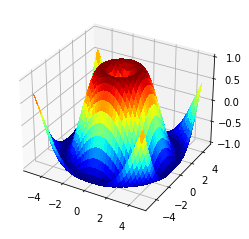

In [46]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

/tmp/ipykernel_663/1151487753.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


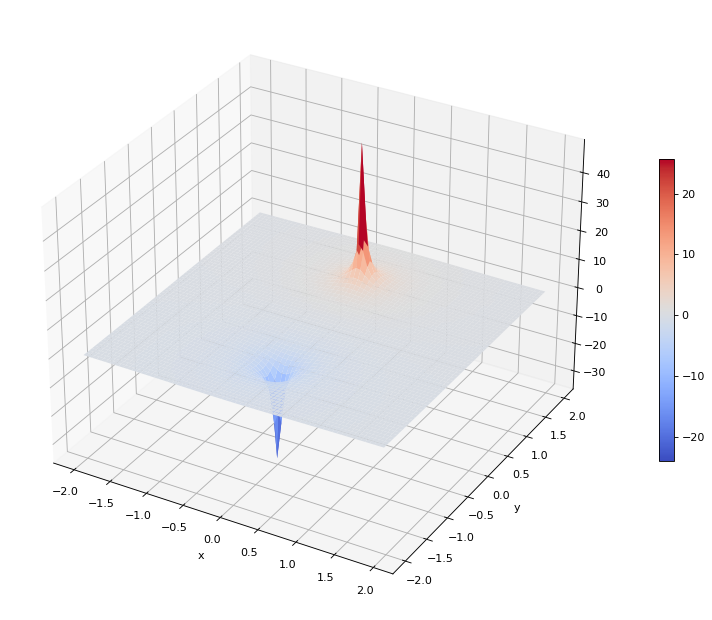

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Hacemos una malla x-y entre -2<x<2 and -2<y<2 en steps de 0.06
dx = 0.06
dy = 0.06
x = np.arange(-2, 2, dx)
y = np.arange(-2, 2, dy)
x, y = np.meshgrid(x, y)

# La fucnión V(x,y)
k = 1; q = 1; d = 1
V=(k*q/(x**2+(y-d)**2)**(1/2.)) - (k*q/(x**2+(y+d)**2)**(1/2.))

# Para usar los gráficos 3D en matplotlib, debemos crear una instancia de la clase Axes3D. 
fig = plt.figure(figsize=(15, 10), dpi=80)

# Usemos el método gca ("get current axis") en la figura para obtener la proyección 3D
ax = fig.gca(projection='3d')
p = ax.plot_surface(x, y, V, rstride=1, cstride=1, linewidth=0,cmap=cm.coolwarm)

#¿Qué significan los argumentos?
#help(Axes3D.plot surface). 
cb = fig.colorbar(p, shrink=0.5)

plt.xlabel("x")
plt.ylabel("y")

plt.savefig("Dipole.png")

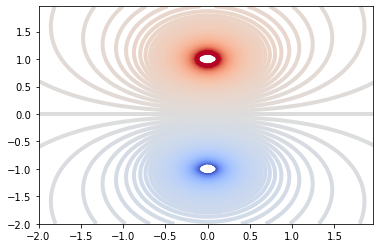

In [48]:
# Representa gráficos 3D pero en contornos...
levels = np.arange(-8, 8,0.1 )
plt.contour(x,y,V,levels ,linewidths=4,cmap=cm.coolwarm);

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [9]:
%cat chirps-Copy1.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

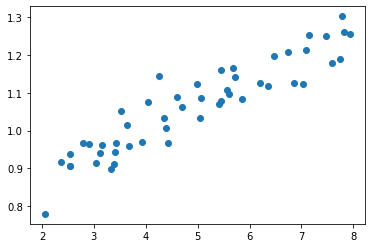

In [10]:
import matplotlib.pyplot as plt

datos = np.loadtxt("chirps-Copy1.txt")
x=[]
y=[]
for i in datos:
    x.append(float(i[0]))
    y.append(float(i[1]))
coordX=np.array(x)
coordY=np.array(y)
plt.scatter(X,Y, label="chirps")

In [11]:
rl= RegresionLineal(alpha=0.0003, max_iters=10000, tols=0.00001)
rl.gradientDescent(coordX,coordY)

In [12]:
plotModelo(coordX,coordY,rl,84671)

IndexError: list index out of range


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [14]:
X1=np.array([10.,8.,13.,9.,11.,14.,6.,4.,12.,7.,5.])
Y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
X2=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y2=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
X3=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
X4=np.array([8,8,8,8,8,8,8,19,8,8,8])
Y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])

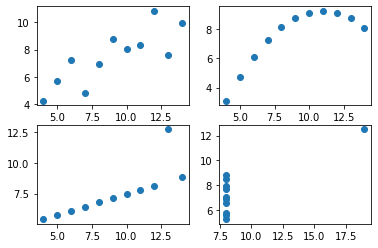

In [15]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(X1,Y1)
ax[0,1].scatter(X2,Y2)
ax[1,0].scatter(X3,Y3)
ax[1,1].scatter(X4,Y4)

In [16]:
r1=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
r1.gradientDescent(X1,Y1)

La función convergió con beta: [2.47216482 0.55236589] en la iteración 52408


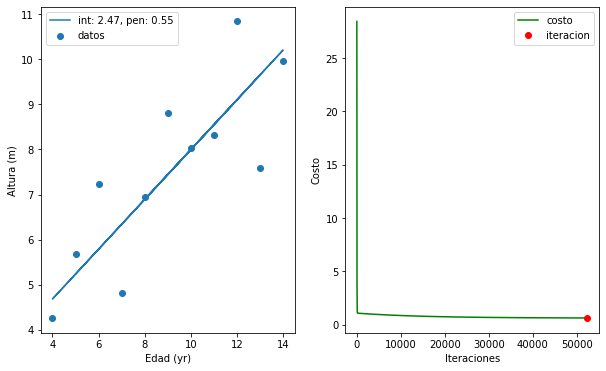

In [17]:
plotModelo(X1,Y1,r1,52408-1)

In [18]:
r2=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
r2.gradientDescent(X2,Y2)

La función convergió con beta: [2.4729729  0.55227598] en la iteración 52416


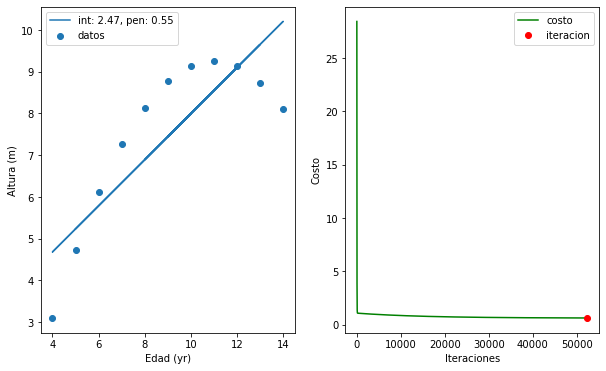

In [19]:
plotModelo(X2,Y2,r2,52408-1)

In [20]:
r3=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
r3.gradientDescent(X3,Y3)

La función convergió con beta: [2.47453017 0.55200209] en la iteración 52433


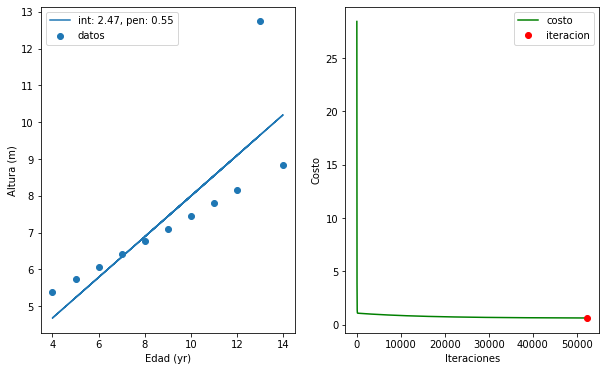

In [21]:
plotModelo(X3,Y3,r3,52433-1)

In [22]:
r4=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
r4.gradientDescent(X4,Y4)

La función convergió con beta: [2.47379826 0.55218436] en la iteración 52425


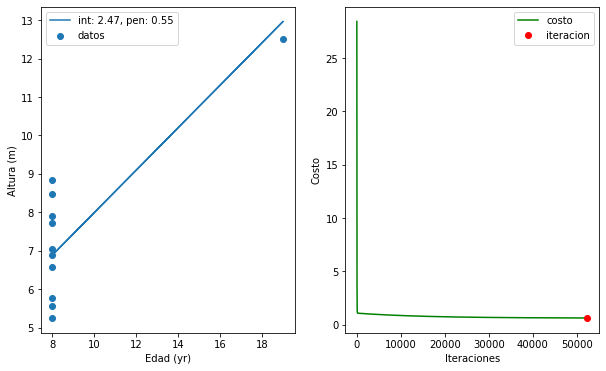

In [23]:
plotModelo(X4,Y4,r4,52425-1)

## Problema 5

Use el archivo `radioactive_decay.dat`

In [24]:
%cat radioactive_decay-Copy1.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

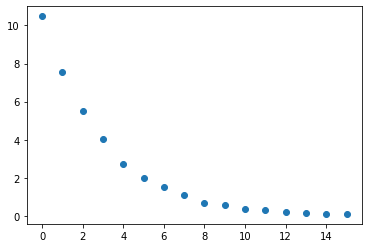

In [25]:
datos2= np.loadtxt("radioactive_decay-Copy1.txt",dtype="float", delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, like=None)

time=[]
N = []

for i in datos2:
    time.append(float(i[0]))
    N.append (float(i[1]))
T = np.array(time)
N = np.array(N)

plt.scatter(T,N, label="Radioactive Decay")

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

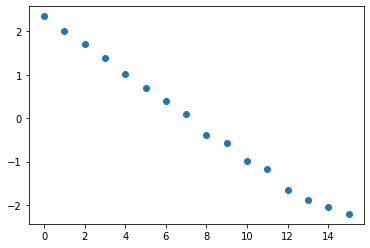

In [27]:
lista = []
for i in N:
    if i !=0:
        lista.append(np.log(i))
    else:
        lista.append(0.)
lista = np.array(lista)
plt.scatter(T,lista)

In [30]:
lista2 = []
for i in range(len(T)):
    lista2.append((T[i],lista[i]))
A = np.array(lista2)
np.savetxt("transform_radioactive_decay-Copy1.txt",A)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [31]:
datos3 = np.loadtxt("transform_radioactive_decay-Copy1.txt")
T3 = []
N3 = []
for i in range(len(datos3)):
    T3.append(datos3[i][0])
    N3.append(datos3[i][1])

time3=np.array(T3)
number3= np.array(N3)

/tmp/ipykernel_797/3967838282.py:1: UserWarning: loadtxt: Empty input file: "transform_radioactive_decay-Copy1.txt"
  datos3 = np.loadtxt("transform_radioactive_decay-Copy1.txt")


In [32]:
rlineal = RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
rlineal.gradientDescent(time3,number3)

/tmp/ipykernel_797/2438514600.py:62: RuntimeWarning: invalid value encountered in true_divide
  return np.dot(x.T, error) / m
/tmp/ipykernel_797/2438514600.py:57: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(error.T, error) / (2 * m)


**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.